> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Predict housing prices

The goal of this activity is to predict the median price (in $1,000's) of homes given their characteristics.

The [Boston Housing Prices](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) dataset is frequently used to test regression algorithms.

![Boston suburb](https://github.com/bpesquet/mlkatas/blob/master/models/images/boston_housing.jpg?raw=1)

The dataset contains information gathered in the 1970s concerning housing in the Boston suburban area. Each house has the following features.

| Feature | Description |
| --- | --- |
| 0 | Per capita crime rate by town |
| 1 | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| 2 | Proportion of non-retail business acres per town. |
| 3 | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| 4 | Nitric oxides concentration (parts per 10 million) |
| 5 | Average number of rooms per dwelling |
| 6 | Proportion of owner-occupied units built prior to 1940 |
| 7 | Weighted distances to five Boston employment centres |
| 8 | Index of accessibility to radial highways |
| 9 | Full-value property-tax rate per $10,000 |
| 10 | Pupil-teacher ratio by town |
| 11 | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| 12 | Lower status of the population |



## Environment setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression

scikit-learn version: 0.23.2


## Step 1: Loading the data

In [4]:
dataset = load_boston()

# Describe the dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Show a sample of raw training data
df_boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target to DataFrame
df_boston['MEDV'] = dataset.target
# Show 10 random samples
df_boston.sample(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60,22.3
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19,33.2
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5
51,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
437,15.17720,0.0,18.10,0.0,0.740,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45,8.7
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.5
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
74,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1


In [6]:
# Print a concise summary of the dataset
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Step 2: Preparing the data

### Question

Store input data and labels into the `x` and `y` variables respectively.

In [7]:
# YOUR CODE HERE
x = dataset.data
y = dataset.target

In [8]:
print(f'x: {x.shape}. y: {y.shape}')

assert x.shape == (506, 13)
assert y.shape == (506,)

x: (506, 13). y: (506,)


### Question

Prepare data for training. Store the data subsets in variables named `x_train`/`y_train` and `x_test`/`y_test` with a 20% ratio.

In [9]:
# YOUR CODE HERE
# Faire le split à la fois sur x et y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

assert x_train.shape == (404, 13)
assert y_train.shape == (404,)
assert x_test.shape == (102, 13)
assert y_test.shape == (102,)

x_train: (404, 13). y_train: (404,)
x_test: (102, 13). y_test: (102,)


### Question

Scale features by standardization while preventing information leakage from the test set.

In [11]:
# YOUR CODE HERE
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
mean_train = x_train.mean()
std_train = x_train.std()
print(f'mean_train: {mean_train}. std_train: {std_train}')

assert np.abs(np.max(mean_train)) < 10**-6
assert np.abs(np.max(std_train - 1)) < 10**-6

mean_train: 3.579771665691594e-15. std_train: 1.0000000000000002


## Step 3: Training a model

### Question

Create a `SGDRegressor` instance and store it into the `model` variable. Fit this model on the training data.

In [13]:
# YOUR CODE HERE
model = SGDRegressor()
model.fit(x_train, y_train)

SGDRegressor()

## Step 4: Evaluating the model

### Question

Compute the training and test MSE into the `mse_train` and `mse_test` variables respectively.

In [14]:
# YOUR CODE HERE
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = np.mean((y_train - y_train_pred) **2)
mse_test = np.mean((y_test - y_test_pred) **2)

Training MSE: 21.99. Test MSE: 23.49


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

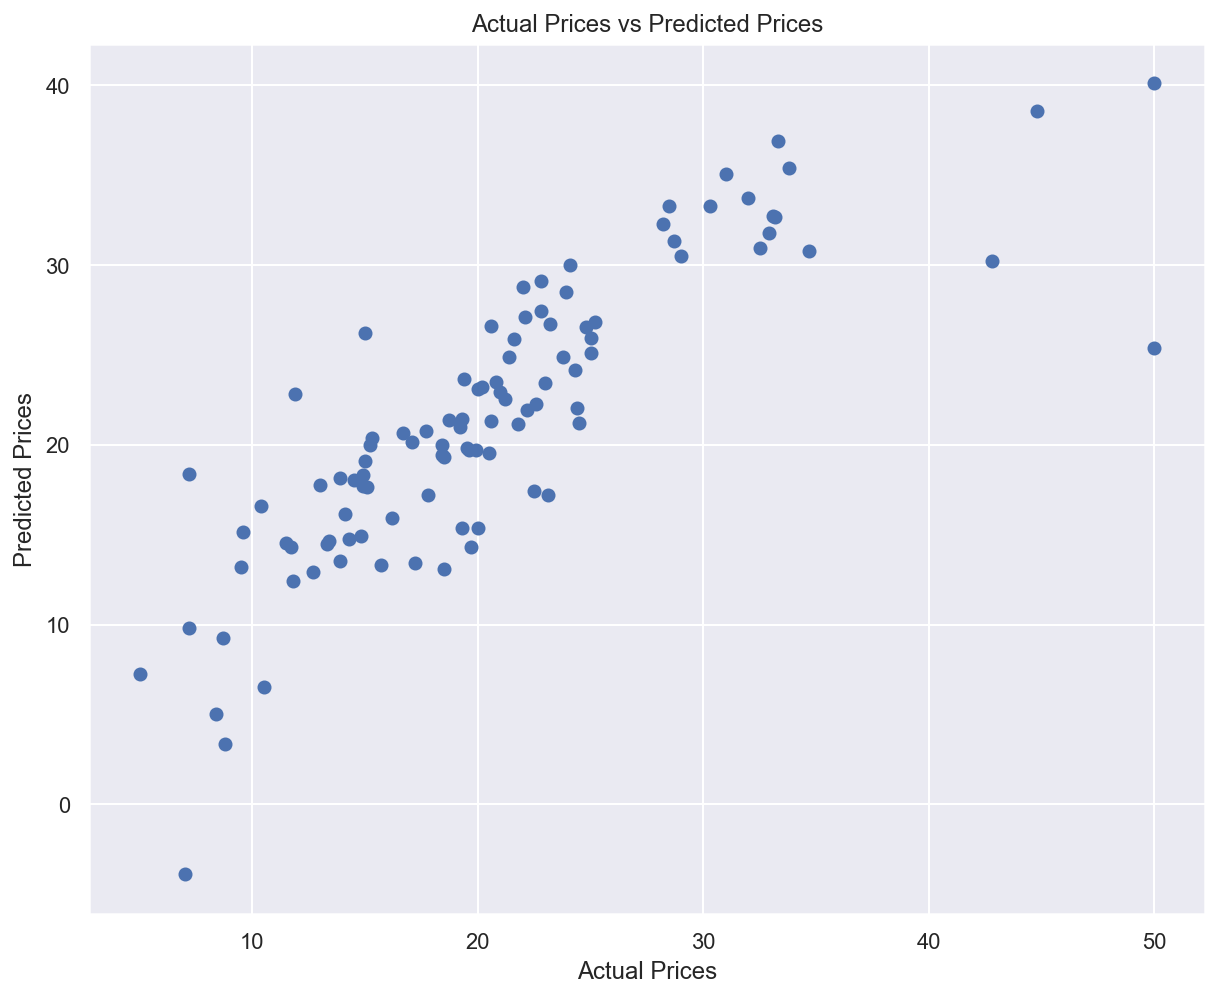

In [15]:
print (f'Training MSE: {mse_train:.2f}. Test MSE: {mse_test:.2f}')

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

### Question

Go back to step 3 and try to obtain the best possible test MSE by tweaking the `SGDRegressor` parameters.

## Step 5: Use another regression algorithm

### Question

- Create and fit a `LinearRegression` instance, which uses the normal equation instead of gradient descent.
- Compute the training and test MSE for this instance (variables `mse_train_n` and `mse_test_n`). How does it compare to the `SGDRegressor` in this case?

In [16]:
# YOUR CODE HERE
# YOUR CODE HERE
model_n = LinearRegression()
model_n.fit(x_train, y_train)

LinearRegression()

In [17]:
# YOUR CODE HERE
y_train_pred_n = model_n.predict(x_train)
y_test_pred_n = model_n.predict(x_test)

mse_train_n = np.mean((y_train - y_train_pred_n) **2)
mse_test_n = np.mean((y_test - y_test_pred_n) **2)

Training MSE: 21.72. Test MSE: 23.69


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

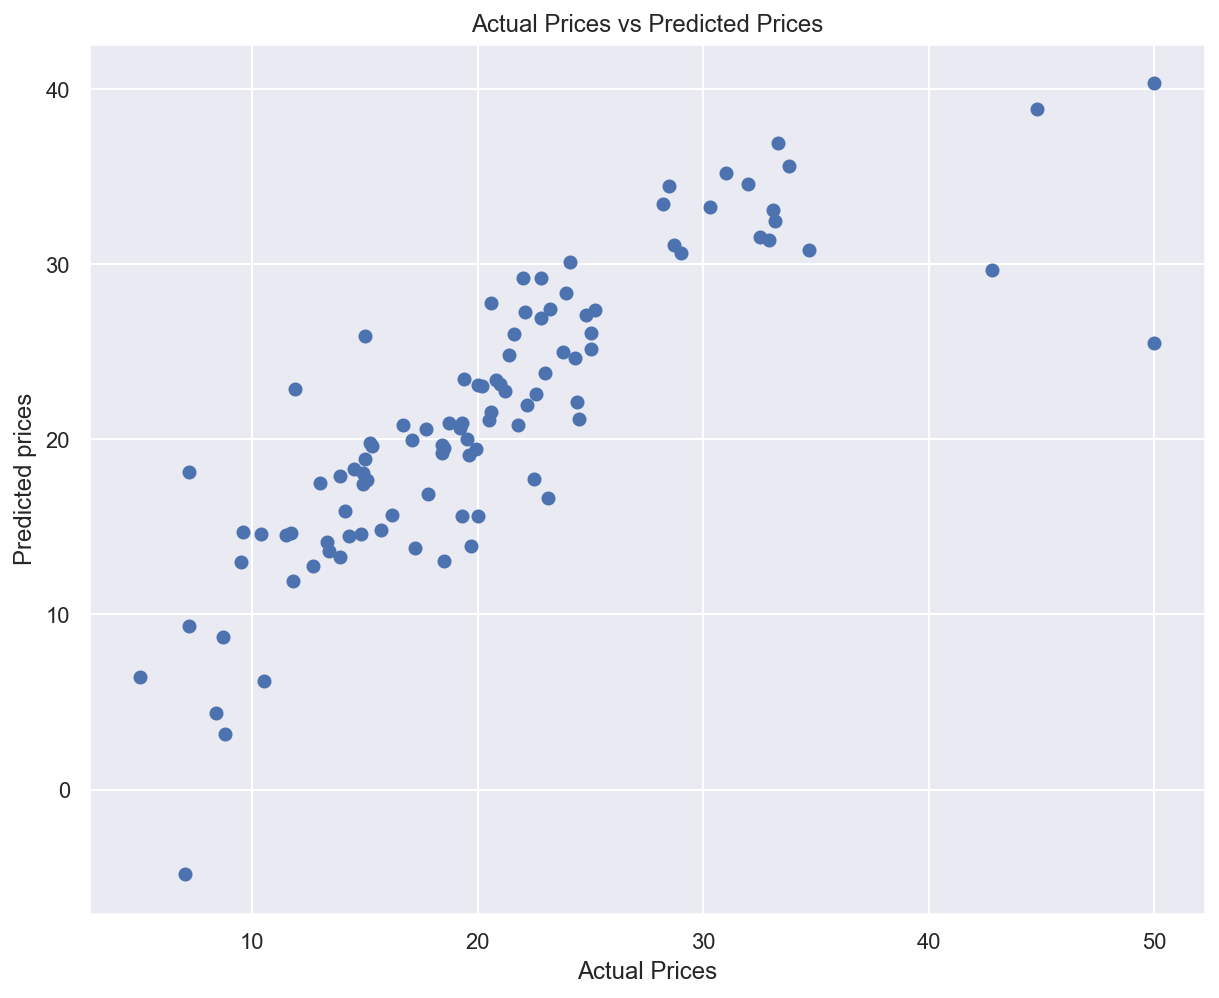

In [18]:
print (f'Training MSE: {mse_train_n:.2f}. Test MSE: {mse_test_n:.2f}')

plt.scatter(y_test, y_test_pred_n)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")